In [1]:
# Initialize network object.
from monomerGating import *
n = network(100.0, 1.0, 0.1, 100.0, 1.0)

In [2]:
# Run simulation.
dt = 1.0e-3
tFinal = 100.0
n.evolve(dt, tFinal)

The branching rate is 1.29243064456 /s


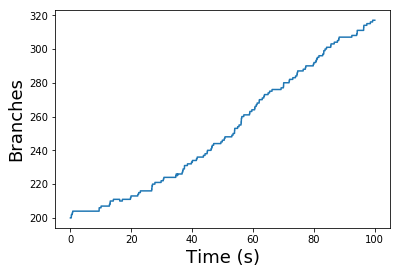

In [3]:
# Plot.
from matplotlib.pyplot import plot, xlabel, ylabel
from numpy import array, zeros, arange, gradient
from scipy.stats import linregress
%matplotlib inline

noBarbsArr = array([a for a, b, c in n.noFilaments])
noBranchesArr = array([b for a, b, c in n.noFilaments])
noCapsArr = array([c for a, b, c in n.noFilaments])
timeArr = linspace(0.0, n.tElapsed, len(noBranchesArr))
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr, noBranchesArr)
plot(timeArr, noBarbsArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Branches", fontsize = 18)
print("The branching rate is " + str(slope) + " /s")

Text(0,0.5,'Number of actin-bound sites')

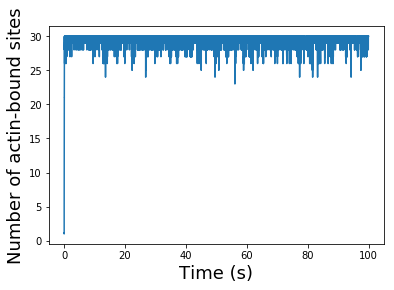

In [4]:
# WH2 domain occupancy
plot(timeArr, n.noFilledArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Number of actin-bound sites", fontsize = 18)

The capping rate is 0.0221666318631 /s


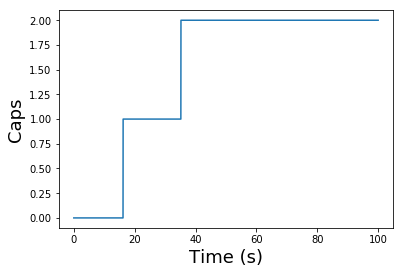

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr[:-1000], noCapsArr[:-1000])
plot(timeArr, noCapsArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Caps", fontsize = 18)
print("The capping rate is " + str(slope) + " /s")

The growth rate is 63.1811239587 nm/s


Text(0,0.5,'Leading edge position')

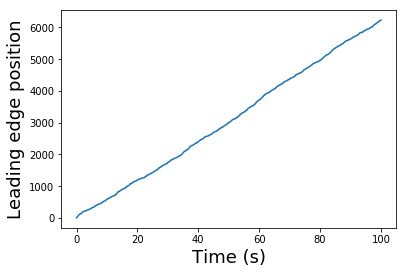

In [6]:
plot(timeArr, n.xEdge)
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr, n.xEdge)
print("The growth rate is " + str(slope) + " nm/s")
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Leading edge position", fontsize = 18)

1


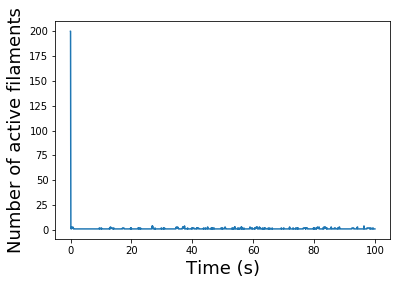

In [7]:
plot(timeArr, n.noActiveArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Number of active filaments", fontsize = 18)
print(n.noActiveArr[-1])

Text(0,0.5,'Estimated PDF')

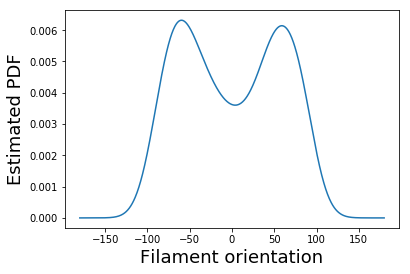

In [8]:
from scipy import stats
thetaArr = n.getAngles() / pi * 180
kde = stats.gaussian_kde(thetaArr)
x = linspace(-180, 180, 1000)
p = kde(x)
plot(x, p)
xlabel('Filament orientation', fontsize = 18)
ylabel('Estimated PDF', fontsize = 18)

The average filament length is 52.0229212272 nm.


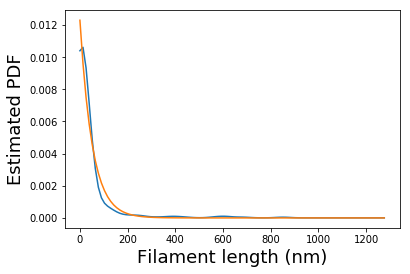

In [9]:
kdeFilamentLength = stats.gaussian_kde(n.filamentLengthArr)
xFilamentLengthArr = linspace(0, 1.5 * amax(n.filamentLengthArr), 100)
pFilamentLengthArr = kdeFilamentLength(xFilamentLengthArr)


from scipy.optimize import curve_fit
from numpy import exp
def exponential_decay(x, a, b, c):
    return a * exp(-x / b) + c

popt, pcov = curve_fit(
    exponential_decay, xFilamentLengthArr, pFilamentLengthArr,
    p0 = (0.0025, 200.0, 0.0))

plot(xFilamentLengthArr, pFilamentLengthArr,
     xFilamentLengthArr, exponential_decay(xFilamentLengthArr, *popt))
ylabel('Estimated PDF', fontsize = 18)
xlabel('Filament length (nm)', fontsize = 18)
print("The average filament length is " + str(popt[1]) + " nm.")